## In This Notebook We will be doing Conditional Probabilities and Bayes' Theorem for Those Columns:
1. **Sex**
2. **Fast_bld_sugar**
3. **ex_angina**
4. **chest_pain**
5. **rest_ecg**
6. **slope**
7. **colored_vessels**
8. **thalassemia**

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

preprocessed_data = pd.read_csv('preprocesed heart disease.csv')
print(preprocessed_data.shape)
preprocessed_data.head()

(300, 14)


,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
0,63,Male,Asymptomatic,145,233,> 120 mg/dl,Normal,150,No,2.3,Upsloping,0,Normal,Disease Present
1,37,Male,Non-Anginal Pain,130,250,<= 120 mg/dl,ST-T wave abnormality,187,No,3.5,Upsloping,0,Fixed Defect,Disease Present
2,41,Female,Atypical Angina,130,204,<= 120 mg/dl,Normal,172,No,1.4,Downsloping,0,Fixed Defect,Disease Present
3,56,Male,Atypical Angina,120,236,<= 120 mg/dl,ST-T wave abnormality,178,No,0.8,Downsloping,0,Fixed Defect,Disease Present
4,57,Female,Typical Angina,120,354,<= 120 mg/dl,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,Disease Present


### Designing a function to calculate the Conditional Probabilities and the Bayes' Theorem and plot them both.

In [83]:
def conditional_probabilities_bayes_theorem(col):
    # Calculate conditional probabilities
    col_prob = preprocessed_data[col].value_counts(normalize=True)
    disease_prob = preprocessed_data["target"].value_counts(normalize=True)['Disease Present']
    disease_mask = preprocessed_data["target"] == 'Disease Present'
    total_entries = preprocessed_data.shape[0]
    col_and_disease = preprocessed_data[disease_mask][col].value_counts() / total_entries
    cond_prob = pd.DataFrame()
    cond_prob[f"P(disease | {col})"] = col_and_disease / col_prob
    cond_prob[f"P({col} | disease)"] = (cond_prob[f"P(disease | {col})"] * col_prob) / (disease_prob)

    print(cond_prob)

    # Plot probabilities
    plt.figure()
    ax = cond_prob.plot.bar(figsize=(12,8), rot=0)
    ax.set_ylabel("Probability")
    ax.set_xlabel(f'{col}')
    ax.set_title(f'Conditional Probabilities and Bayes\' Theorem for {col} Given Target = Disease')
    plt.savefig(f'figs/conditional_probabilities_and_bayes_thearom_for_{col}_given_target.png', format='png', dpi=300)

- The probability of someone is having a heart disease given that she is Female is 75%, Which is a huge probability that women tend to be more likely disease present.
- The probability of someone is a Male given that he is disease present is 56.4%

        P(disease | sex)  P(sex | disease)
Male            0.448780          0.564417
Female          0.747368          0.435583


<Figure size 640x480 with 0 Axes>

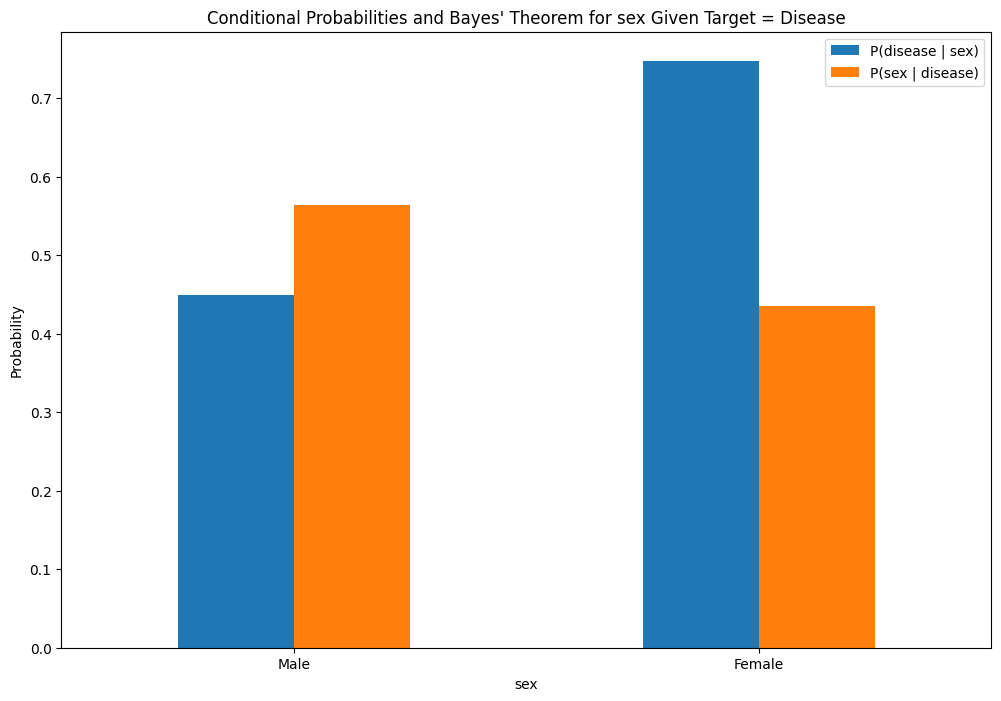

In [84]:
conditional_probabilities_bayes_theorem('sex')

- The Probability of someone having lower than or equal 120 mg/dl fast blood sugar given that he/she is dignosed a disease present is 86%, this is a good insight that higher blood sugar is an indication of being a heart disease present.
- The Probability of someone having more than 120 mg/dl fast blood sugar given that he/she is dignosed a disease present is 14%

              P(disease | fast_bld_sugar)  P(fast_bld_sugar | disease)
<= 120 mg/dl                     0.546875                     0.858896
> 120 mg/dl                      0.522727                     0.141104


<Figure size 640x480 with 0 Axes>

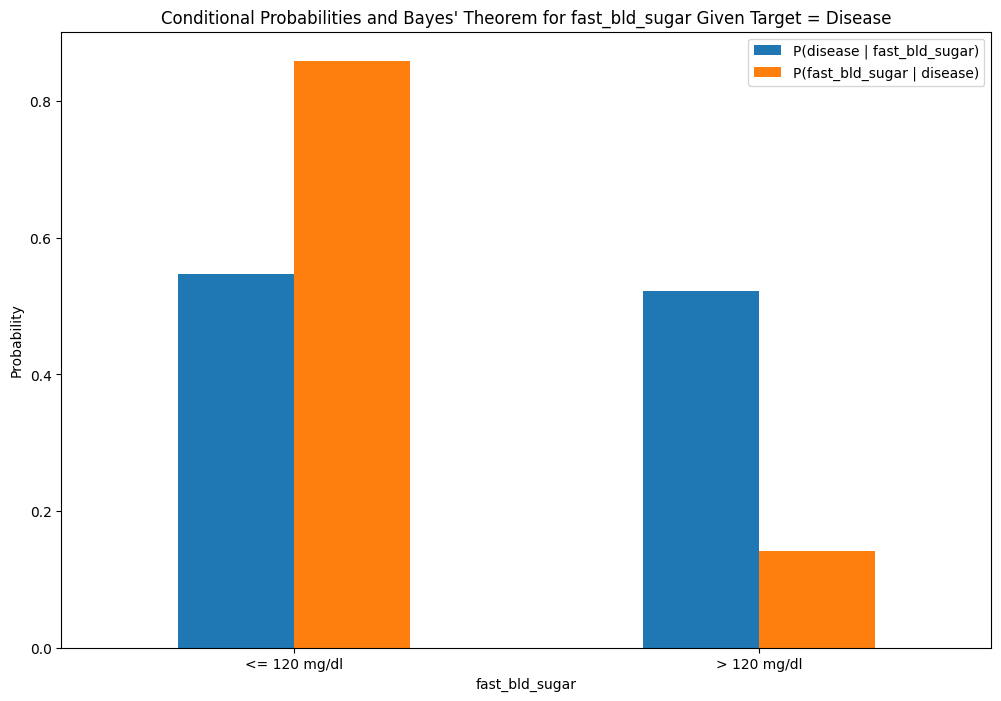

In [85]:
conditional_probabilities_bayes_theorem('fast_bld_sugar')

- The Probability of someone being disease present given that he/she has an exercise-induced angina is 69%
- The Probability of someone having exercise-induced angina given that he/she is diagnosed heart present is 86%, this is an andication of the absence of exercise-induced angina highers the chances of having heart disease.

     P(disease | ex_angina)  P(ex_angina | disease)
No                 0.693069                0.858896
Yes                0.234694                0.141104


<Figure size 640x480 with 0 Axes>

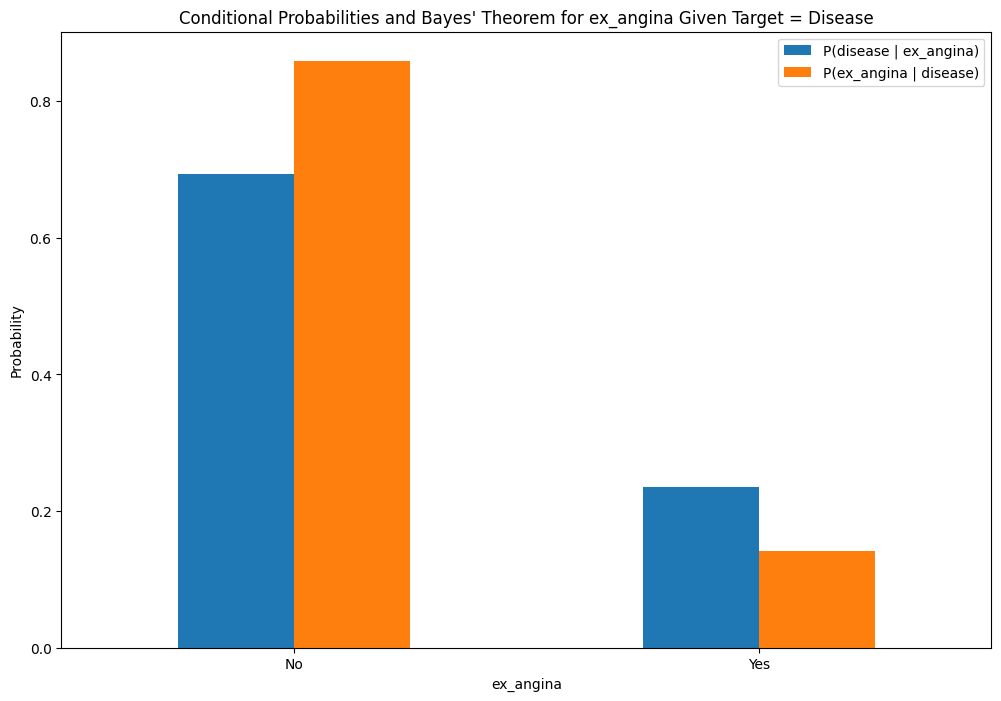

In [86]:
conditional_probabilities_bayes_theorem('ex_angina')

- Atypical Angina, Non-Anginal Pain chest pains highers the chances of being heart present.
- The Probability of someone has a Non-Anginal Pain chest pain given that he/she is disease present is 41% which is the highest probability among all the chest pains.

                  P(disease | chest_pain)  P(chest_pain | disease)
Asymptomatic                     0.695652                 0.098160
Atypical Angina                  0.820000                 0.251534
Non-Anginal Pain                 0.788235                 0.411043
Typical Angina                   0.274648                 0.239264


<Figure size 640x480 with 0 Axes>

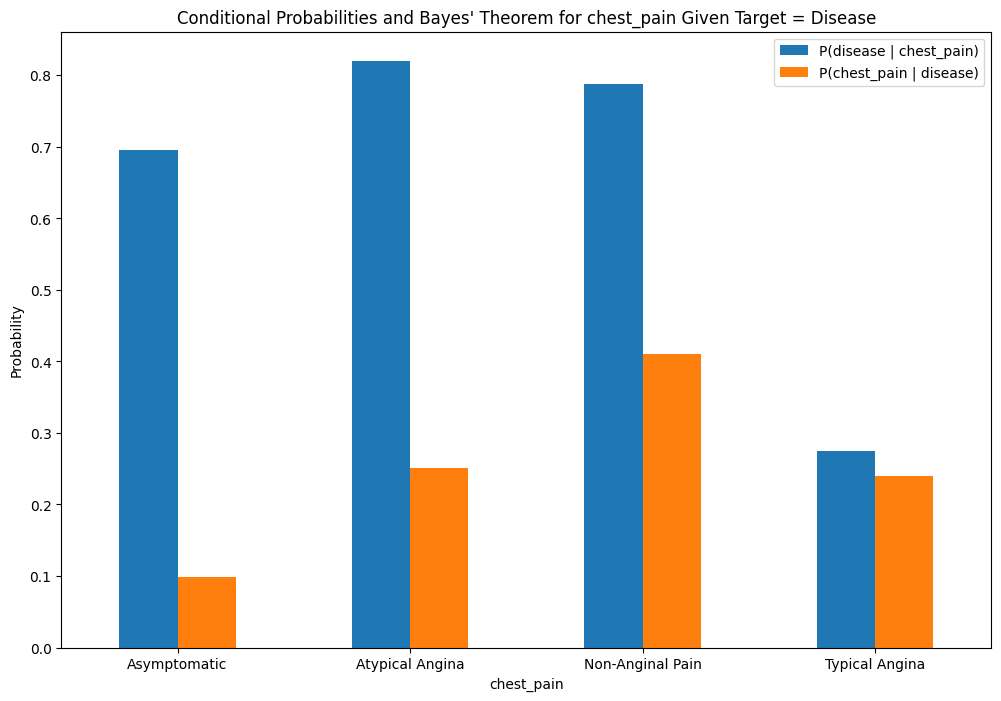

In [87]:
conditional_probabilities_bayes_theorem('chest_pain')

- ST-T wave abnormality highers the chances of being heart present.
- The Probability of someone having Left ventricular hypertrophy given that he/she is disease present is 0.6%, which can be considered by the medical institute.

                              P(disease | rest_ecg)  P(rest_ecg | disease)
ST-T wave abnormality                      0.633333               0.582822
Normal                                     0.458904               0.411043
Left ventricular hypertrophy               0.250000               0.006135


<Figure size 640x480 with 0 Axes>

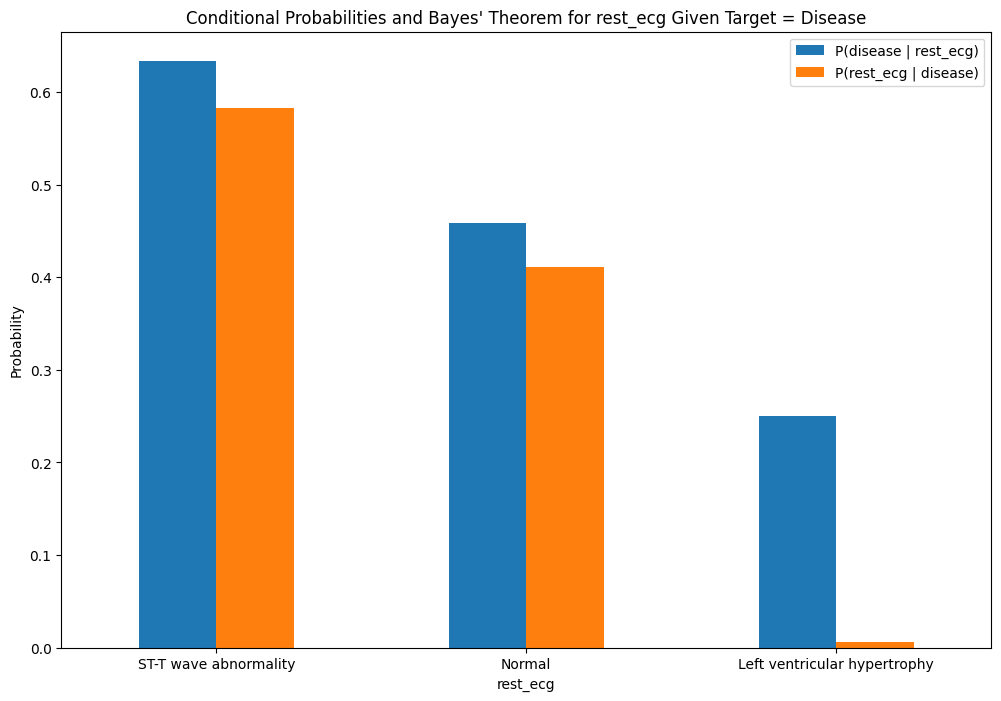

In [88]:
conditional_probabilities_bayes_theorem('rest_ecg')

- DownSloping highers the chances of being heart present.
- The Probability of someone having Upsloping given that he/she is disease present is 5%, which can be considered by the medical institute.

             P(disease | slope)  P(slope | disease)
Downsloping            0.750000            0.644172
Flat                   0.352518            0.300613
Upsloping              0.428571            0.055215


<Figure size 640x480 with 0 Axes>

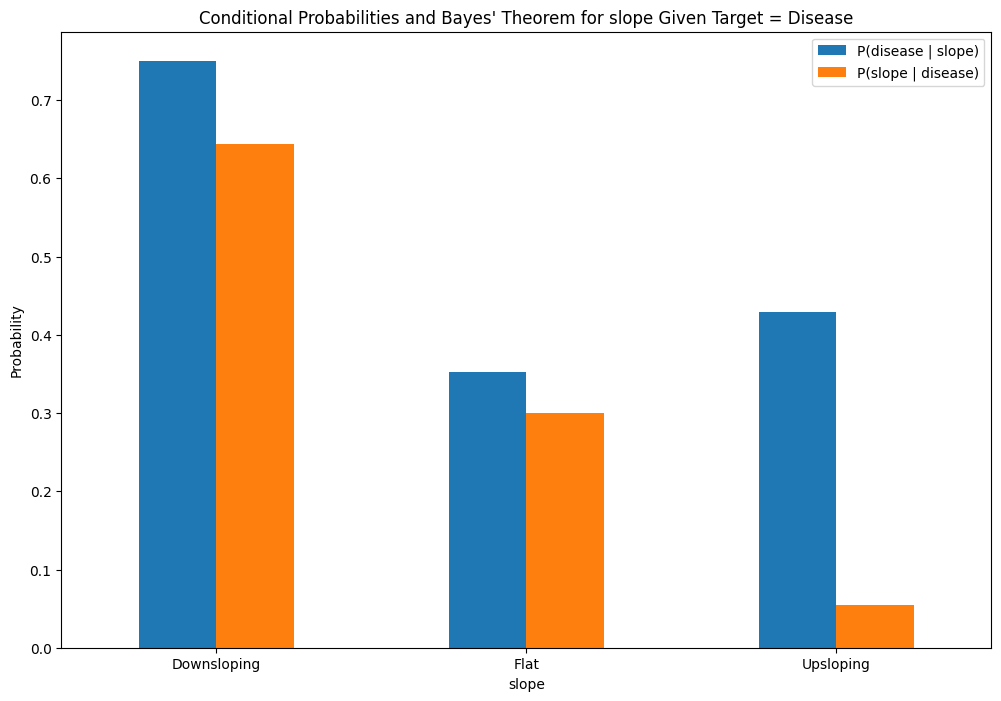

In [89]:
conditional_probabilities_bayes_theorem('slope')

- Having No-Colored Vessels highers the chances of being Heart Disease Present.
- The Probability of being Heart Disease Present given that he/she has four Colored Vessels is 75%

   P(disease | colored_vessels)  P(colored_vessels | disease)
0                      0.745665                      0.791411
1                      0.323077                      0.128834
2                      0.184211                      0.042945
3                      0.150000                      0.018405
4                      0.750000                      0.018405


<Figure size 640x480 with 0 Axes>

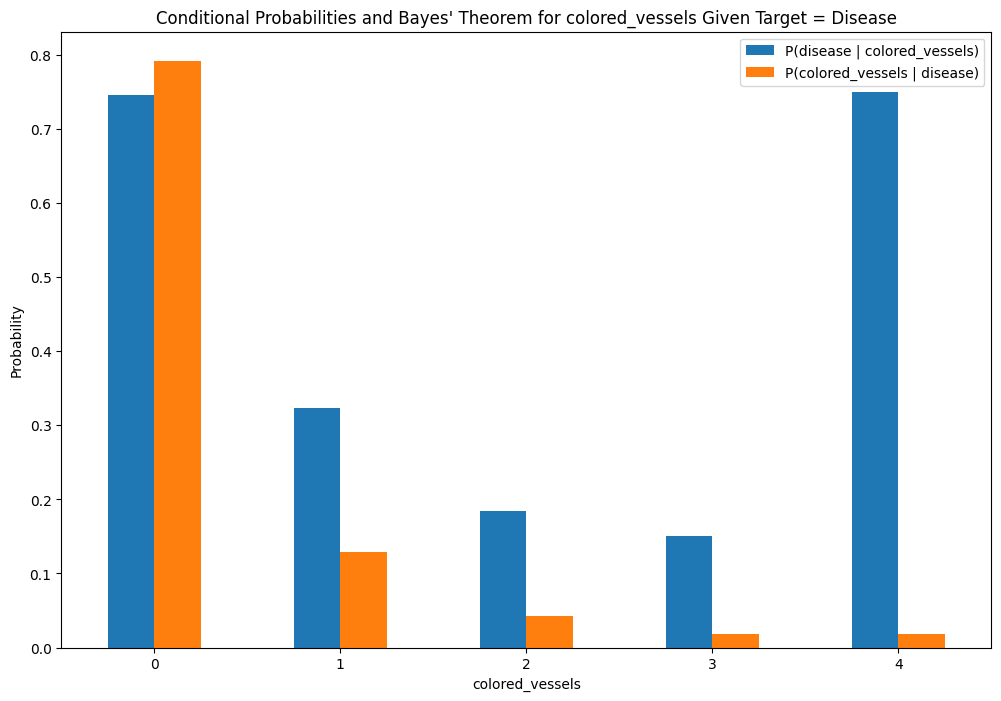

In [90]:
conditional_probabilities_bayes_theorem('colored_vessels')

- Fixed Defect highers the chances of being Heart Disease Present.
- The Probability of someone has Normal Thalassemia given that he/she is disease present is 3%

                   P(disease | thalassemia)  P(thalassemia | disease)
Fixed Defect                       0.781818                  0.791411
Reversible Defect                  0.239316                  0.171779
Normal                             0.333333                  0.036810


<Figure size 640x480 with 0 Axes>

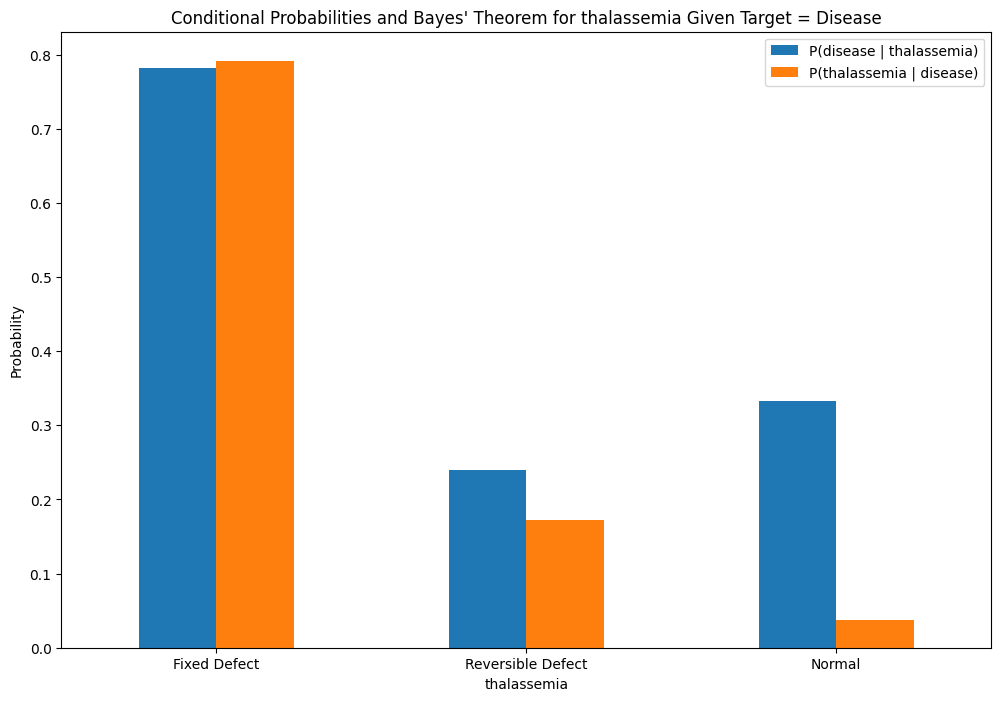

In [91]:
conditional_probabilities_bayes_theorem('thalassemia')